# Super VM - Group A 
# Music Connects - A Spotify Social Network Analysis

## Loading Requiered Packages

In [1]:
import networkx as nx
import sys
import pandas as pd
from networkx.algorithms.centrality import degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality_numpy
from networkx.algorithms.link_analysis import pagerank
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.algorithms import approximation
from itertools import combinations
import matplotlib.pyplot as plt
from itertools import chain
%matplotlib inline


## Importing Data
The file "allArtistsWithPopularity.xlsx" Excel File was generated by connectin R with the Spotify API

In [2]:
df = pd.read_excel("allArtistsWithPopularity.xlsx")
df=df.drop(columns=['temp'])
df['Popularity']=df['Popularity']/20 #Used for edge weight
df.head()

artist_name            name                               track_name  \
0  Cosmic Gate    Gareth Emery  long way home wym315  cosmic gate remix   
1  Cosmic Gate  Ilan Bluestone                       black  blue wym315   
2  Cosmic Gate            Grum             afterglow wym315  kryder mix   
3  Cosmic Gate   Kyau & Albert                     what it takes wym315   
4  Cosmic Gate     gardenstate                             delta wym315   

                                           track_url                      id  \
0  https://open.spotify.com/track/0XsqCowmh9l3FjB...  0hprEC0nsWuQPSHag1O2Vi   
1  https://open.spotify.com/track/04sjt2pE6UFhgo5...  1yoZuH2j43vVSWsOwYuQyn   
2  https://open.spotify.com/track/2qARsdzohnyYRxh...  3VEqFWRt47xQAZJMBF3duQ   
3  https://open.spotify.com/track/55GI04q61Kvt8PK...  0pyi4vNCq5T6GgV1rt7ncc   
4  https://open.spotify.com/track/7rlCKUoEsBKn8NW...  1XcPIHqirx1Jaxm2bAxMeV   

  mode_name key_name  explicit album_release_date  Popularity  
0     major        B     False         2020-04-20        3.25  
1     major       F#     False         2020-04-20        2.70  
2     major       F#     False         2020-04-20        2.55  
3     major        G     False         2020-04-20        2.50  
4     major       F#     False         2020-04-20        1.85

#### The file contains information of the collaborators, artist 1 being artist_name and artist 2 being name. Additionally to this information, we have the name of the track the artists collaborated in, the track url where the song can be found, the id of the track, the mode of the song (whether it is major or minor), the key in which is played, whether if the song has explicit content, when the track was released (album_release_date) and the popularity of the song. There is an auxiliary column called temp, which is dropped for this analysis.

## Creating the network

In [3]:
g = nx.from_pandas_edgelist(df, 'artist_name','name',['Popularity'])
print("Network is connected? ",nx.is_connected(g))
print("Number of songs: ",len(df))
print("Number of unique artists: ",len(set(list(g))))
print("Number of Keys Performed: ",len(df.key_name.unique()))
print("Average Song Popularity: ",round(df.Popularity.mean(),0))

Network is connected?  False
Number of songs:  8719
Number of unique artists:  4017
Number of Keys Performed:  12
Average Song Popularity:  2.0


#### Graphs edges will be sized by their popularity score, for example, 'Despacito' the song performed by Daddy Yankee and Luis Fonsy had a Popularity of 92. Popularity values were scaled to range from zero to five for visualization purposes.

In [4]:
g['Daddy Yankee']['Luis Fonsi']['Popularity']*20

92.0

#### Visualizing the Graph, 4017 nodes

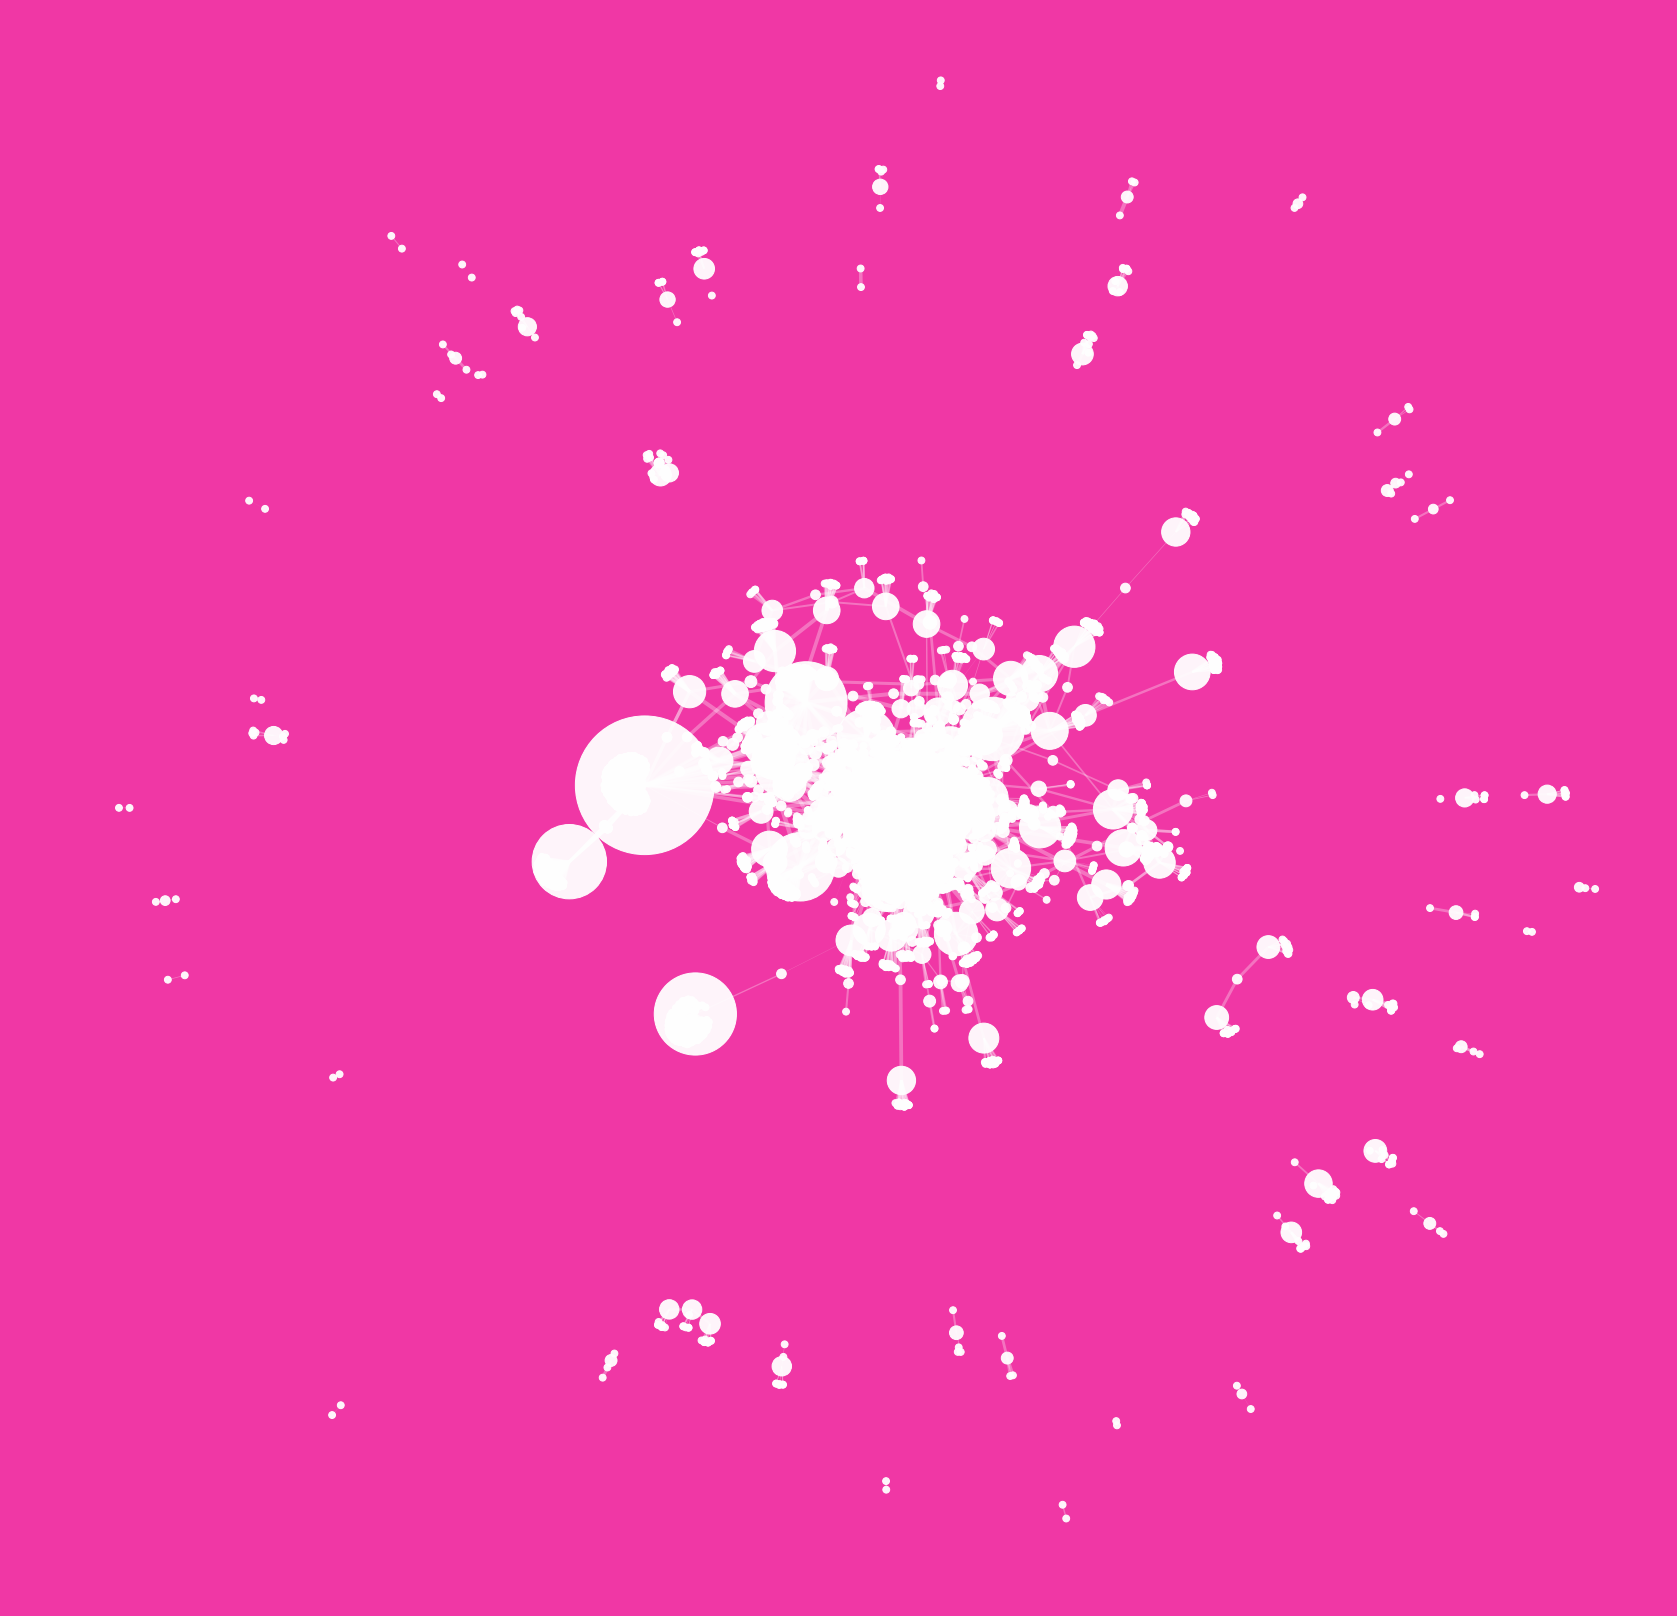

In [59]:
graph=g
weights = [graph[u][v]['Popularity'] for u,v in graph.edges()]
labeldegree=100
labelcolor='w'
#labelcolor='#00b4d9'
labelsgraph=[node for node,degree in dict(graph.degree()).items() if degree > labeldegree]
fig=plt.figure(figsize=(30, 30), dpi= 70)
plt.rcParams['figure.facecolor'] = '#f037a5'
plt.rcParams['axes.facecolor'] = '#f037a5'
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph,pos,node_size=[50 * graph.degree(n) for n in graph],
                       alpha=0.95,with_labels=False,node_color='w')
nx.draw_networkx_edges(graph,pos, width= weights,alpha=0.3,edge_color='w')
for p in pos:  # raise text positions
    pos[p][1] += 0
    pos[p][0] += 0
#nx.draw_networkx_labels(nx.Graph(graph.subgraph(labelsgraph)), pos,font_size=30,
#                        font_color=labelcolor, font_weight='bold')
plt.axis('off')
plt.show()

#### Since our graph object is not connected we will evaluate whether we have isolated nodes and extract all connected subgraphs. We can reiterate that no node is isolated here:

In [6]:
list(nx.isolates(g))

[]

#### There are no isolated nodes in this graph, but by observing the plot we can see various subgraphs

In [7]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
sub_graphs = connected_component_subgraphs(g)

#### Analyzing which nodes belong to each subgraph

In [8]:
for i in (list(connected_component_subgraphs(g))):
    print(list(i))

['Cosmic Gate', 'Gareth Emery', 'Ilan Bluestone', 'Grum', 'Kyau & Albert', 'gardenstate', 'Axis', 'Soulvation', 'Patrick White', 'Thomas Mengel', 'Rafael Osmo', 'Zack Evans', 'Atleha', 'Camilo', 'Shakira', 'Christian Nodal', 'Tali Goya', 'Bubu35', 'Pedro Capó', 'Evaluna Montaner', 'Lito Kirino', 'Fuego', 'Breakfast n Vegas', 'Vasquez La Pesa', 'Vakero', 'Heidi Brown', 'Nelly Nelz', 'Menor Bronx', 'Dowba Montana', 'El Chif', 'G Chamo', 'Tapia', 'Little Sammy', 'EmCee', 'Blacky Drippy', 'Miky Woodz', 'J Balvin', 'Zion & Lennox', 'Wisin', 'Tainy', 'El Alfa', 'Piso 21', 'Nicky Jam', 'Shako', 'Above & Beyond', 'Tinlicker', 'Nihil Young', 'Greenhaven DJs', 'Fiben', 'Johann Sebastian Bach', 'Traditional', 'Christoph Willibald Gluck', 'Christian Petzold', 'Los Rabanes', 'Leonte Bordanea', 'Steve Aoki', 'Tory Lanez', 'Maluma', 'Alan Walker', 'Jerry Di', 'Backstreet Boys', 'Felix Jaehn', 'Alok', 'Noriel', 'Timmy Trumpet', 'Sting', 'Monsta X', 'Icona Pop', 'Showtek', 'Ummet Ozcan', 'Bassjackers',

#### As seen, the first element contains various nodes, whereas the las elements contain a couple nodes. Let's analyza how many nodes are in every subgraph

In [9]:
for i, sg in enumerate(sub_graphs):
    print ("subgraph {} has {} nodes".format(i, sg.number_of_nodes()))

subgraph 0 has 3731 nodes
subgraph 1 has 14 nodes
subgraph 2 has 4 nodes
subgraph 3 has 6 nodes
subgraph 4 has 2 nodes
subgraph 5 has 2 nodes
subgraph 6 has 10 nodes
subgraph 7 has 11 nodes
subgraph 8 has 9 nodes
subgraph 9 has 24 nodes
subgraph 10 has 4 nodes
subgraph 11 has 3 nodes
subgraph 12 has 24 nodes
subgraph 13 has 5 nodes
subgraph 14 has 2 nodes
subgraph 15 has 8 nodes
subgraph 16 has 8 nodes
subgraph 17 has 4 nodes
subgraph 18 has 2 nodes
subgraph 19 has 2 nodes
subgraph 20 has 8 nodes
subgraph 21 has 12 nodes
subgraph 22 has 3 nodes
subgraph 23 has 12 nodes
subgraph 24 has 17 nodes
subgraph 25 has 2 nodes
subgraph 26 has 4 nodes
subgraph 27 has 2 nodes
subgraph 28 has 8 nodes
subgraph 29 has 5 nodes
subgraph 30 has 2 nodes
subgraph 31 has 9 nodes
subgraph 32 has 4 nodes
subgraph 33 has 2 nodes
subgraph 34 has 3 nodes
subgraph 35 has 6 nodes
subgraph 36 has 4 nodes
subgraph 37 has 2 nodes
subgraph 38 has 4 nodes
subgraph 39 has 5 nodes
subgraph 40 has 2 nodes
subgraph 41 has

#### The most frequent size of subgraphs is two (or bigrams), we can look into which two artists conform this bigraph. The subgraph with most elements is subgraph zero, with 3731 nodes.

In [10]:
f=list(list(connected_component_subgraphs(g))[0])

In [11]:
H = nx.Graph(g.subgraph(f))
print(nx.info(H))

Name: 
Type: Graph
Number of nodes: 3731
Number of edges: 5196
Average degree:   2.7853


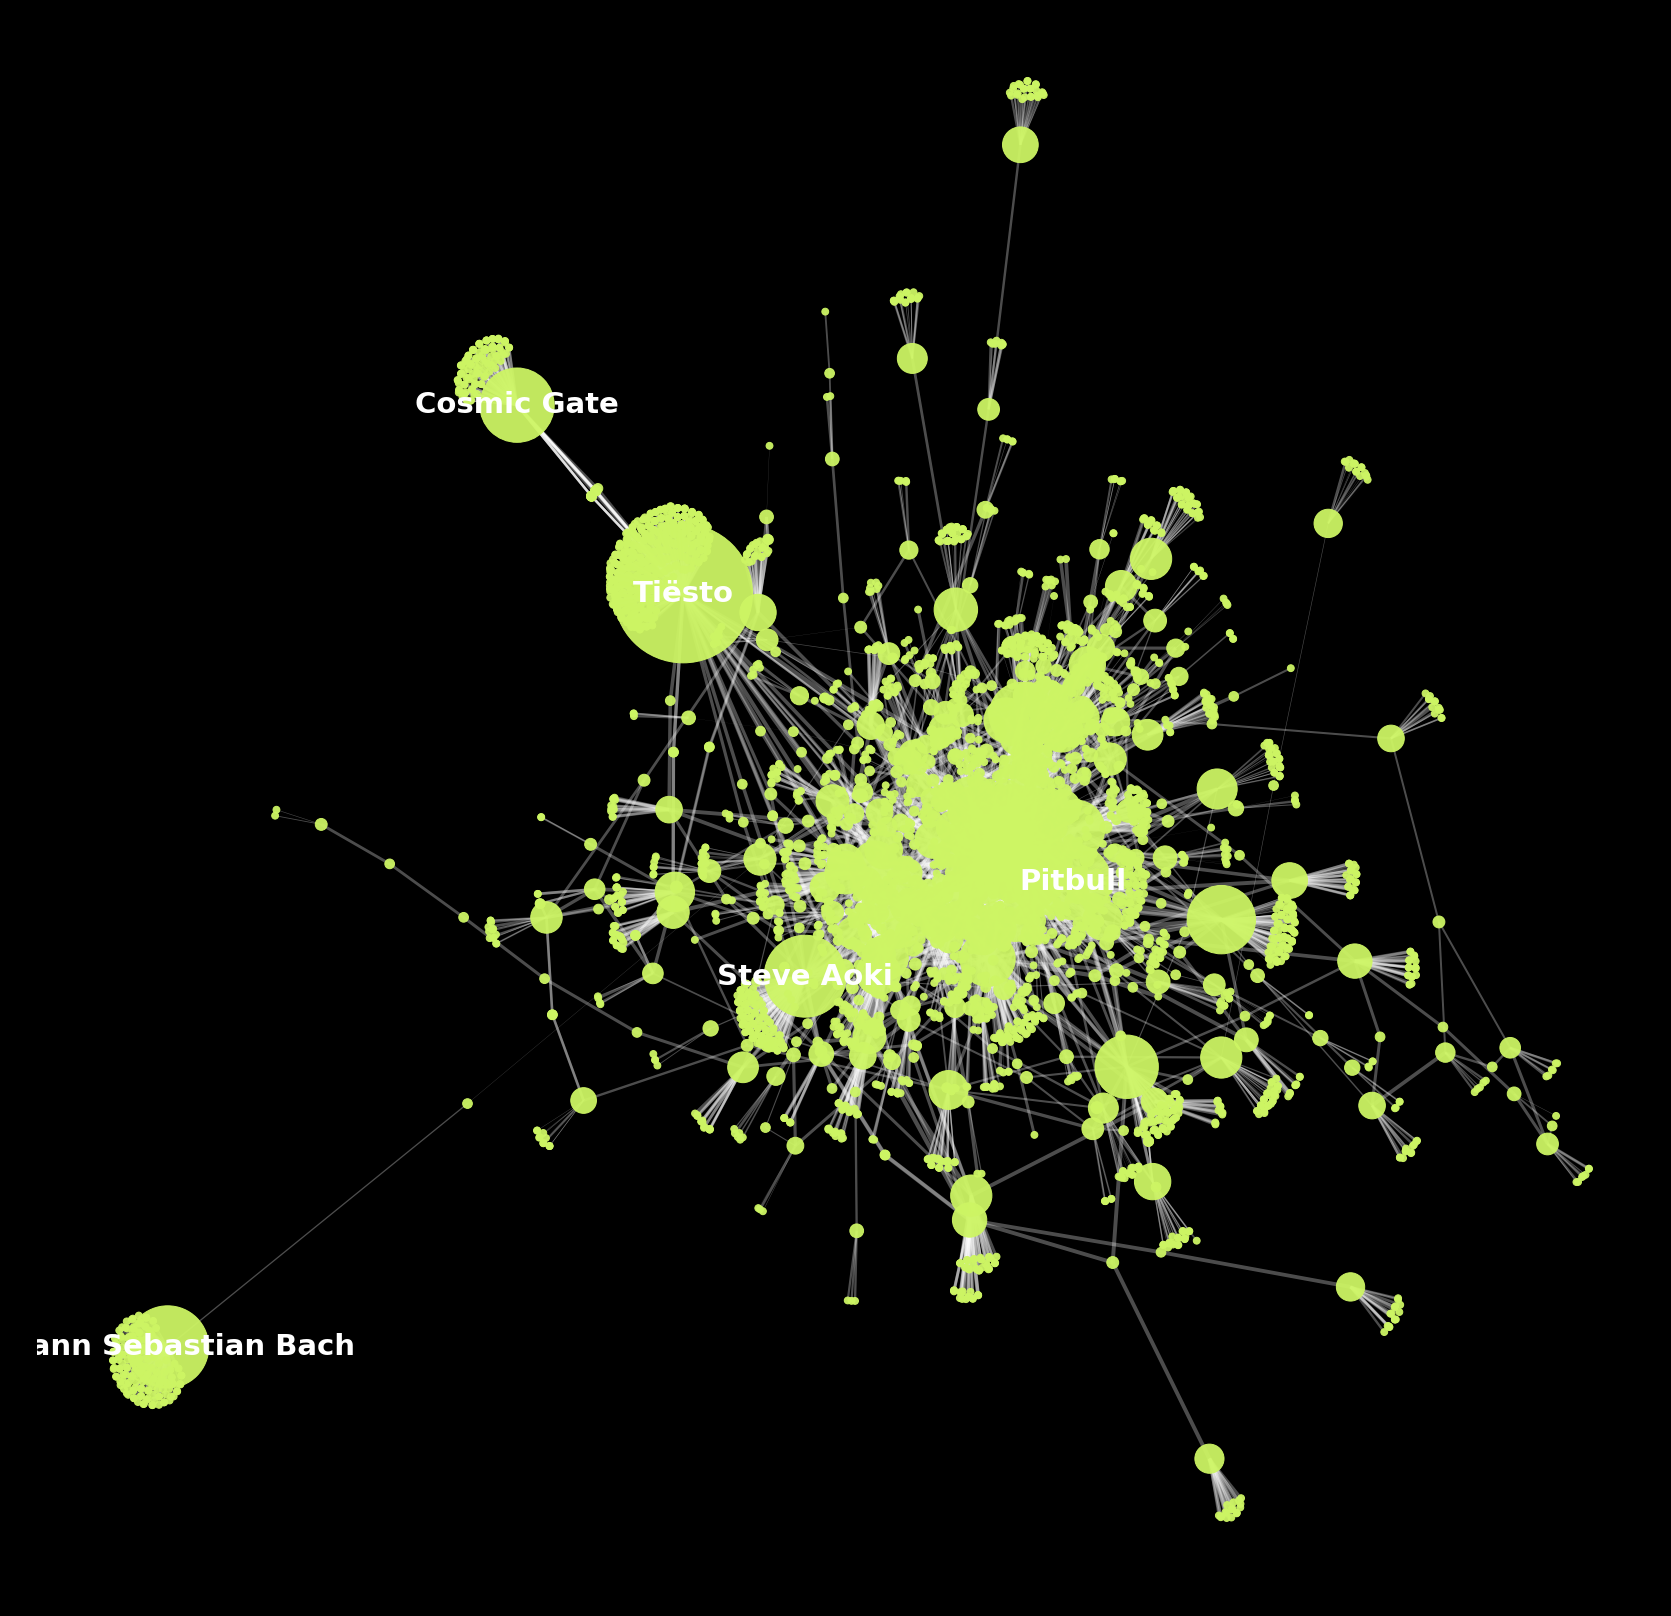

In [12]:
graph=H
weights = [graph[u][v]['Popularity'] for u,v in graph.edges()]
labeldegree=100
labelcolor='w'
#labelcolor='#00b4d9'
labelsgraph=[node for node,degree in dict(graph.degree()).items() if degree > labeldegree]
fig=plt.figure(figsize=(30, 30), dpi= 70)
plt.rcParams['figure.facecolor'] = '#000000'
plt.rcParams['axes.facecolor'] = '#000000'
pos = nx.spring_layout(graph)
#nx.draw(B, pos, with_labels=False,node_color='b')231f20
nx.draw_networkx_nodes(graph,pos,node_size=[50 * graph.degree(n) for n in graph],
                       alpha=0.95,with_labels=False,node_color='#cdf564')
nx.draw_networkx_edges(graph,pos, width= weights,alpha=0.3,edge_color='w')
for p in pos:  # raise text positions
    pos[p][1] += 0
    pos[p][0] += 0
nx.draw_networkx_labels(nx.Graph(graph.subgraph(labelsgraph)), pos,font_size=30,
                        font_color=labelcolor, font_weight='bold')
plt.axis('off')
plt.show()

#### For a closer network, where we keep nodes with high degree, represented in a circular layout

In [13]:
I = nx.Graph(g.subgraph(f))
remove = [node for node,degree in dict(I.degree()).items() if degree < 20]
I.remove_nodes_from(remove)
print(nx.info(I))

Name: 
Type: Graph
Number of nodes: 96
Number of edges: 347
Average degree:   7.2292


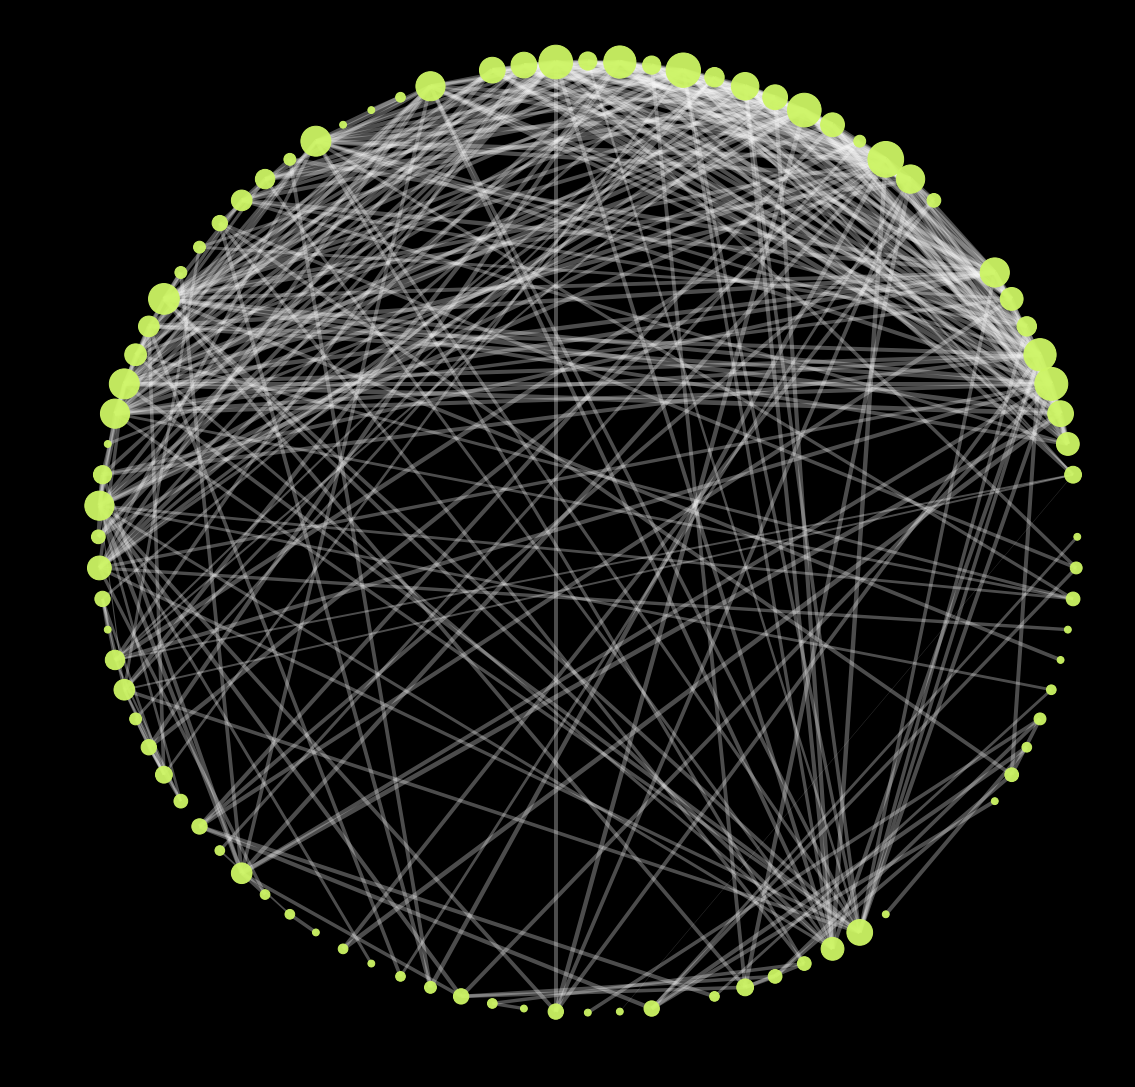

In [14]:
graph=I
weights = [graph[u][v]['Popularity'] for u,v in graph.edges()]
labeldegree=100
labelcolor='w'
#labelcolor='#00b4d9'
labelsgraph=[node for node,degree in dict(graph.degree()).items() if degree > labeldegree]
fig=plt.figure(figsize=(20, 20), dpi= 70)
plt.rcParams['figure.facecolor'] = '#000000'
plt.rcParams['axes.facecolor'] = '#000000'
pos = nx.circular_layout(graph)
#nx.draw(B, pos, with_labels=False,node_color='b')231f20
nx.draw_networkx_nodes(graph,pos,node_size=[50 * graph.degree(n) for n in graph],
                       alpha=0.95,with_labels=False,node_color='#cdf564')
nx.draw_networkx_edges(graph,pos, width= weights,alpha=0.3,edge_color='w')
for p in pos:  # raise text positions
    pos[p][1] += 0
    pos[p][0] += 0
nx.draw_networkx_labels(nx.Graph(graph.subgraph(labelsgraph)), pos,font_size=30,
                        font_color=labelcolor, font_weight='bold')
plt.axis('off')
plt.show()

#### As we recall, the bigraphs are the most frequent kind of subgraph, let's dive into which isolated pairs we find in the network

In [15]:
li=[]
for i in list(nx.connected_components(g)):
    if (len(i)==2): 
        print(i)
        li.append(i)

{'Joan Soriano', 'El Americano de la Bachata'}
{'Alexis Grullon', 'MDO'}
{'Grupo Kual?', 'Las Chicas Tentación'}
{'Ventino', 'Gemeliers'}
{"At' Fat", 'El Tachi'}
{'Everett Gabriel', 'Arevalo'}
{'Obie Bermudez', 'Gustavo Loriano'}
{'Charly Rodriguez', 'Joaquin'}
{'Emilio Rojas', 'Laws'}
{'Jason Rene', 'Jordi MB'}
{'Luis Miguel', 'Adrián Pieragostino'}
{'Victor Magan', 'Feat. Estela Martin'}
{'Cabas', 'Bunbury'}
{'Tom Boxer', 'Anca Parghel'}
{'Rick e Ruan', 'Joel Santos'}
{'Mariah Carey', 'Busta Rhymes'}


In [16]:
J=g.subgraph((list(chain.from_iterable(li))))

In [17]:
print(nx.info(J))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 16
Average degree:   1.0000


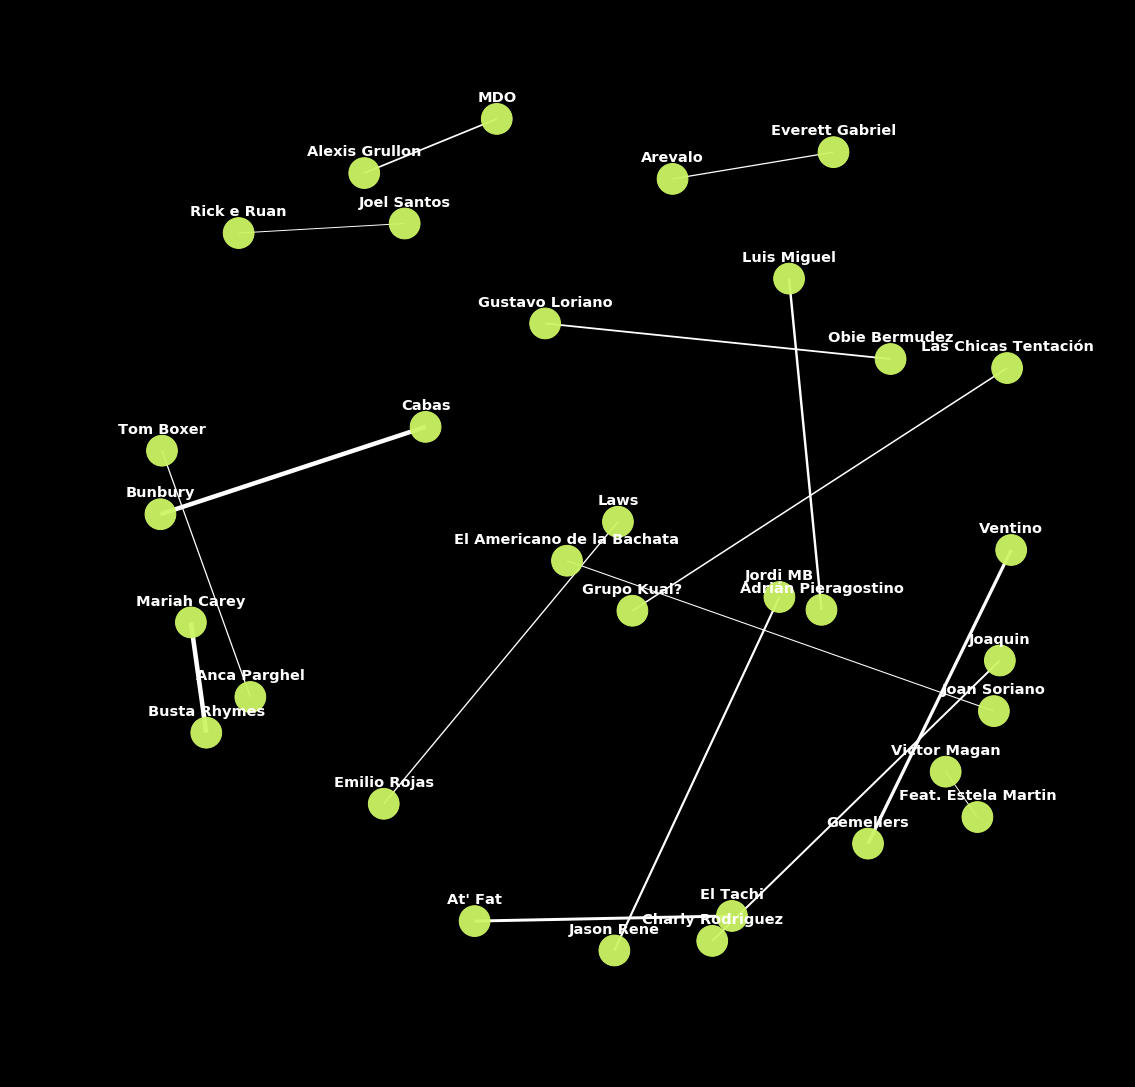

In [18]:
graph=J
weights = [graph[u][v]['Popularity'] + 1 for u,v in graph.edges()] 
labelcolor='w'
#labelcolor='#00b4d9'
fig=plt.figure(figsize=(20, 20), dpi= 70)
plt.rcParams['figure.facecolor'] = '#000000'
plt.rcParams['axes.facecolor'] = '#000000'
pos = nx.fruchterman_reingold_layout(graph,k=1,scale=0.1)
#nx.draw(B, pos, with_labels=False,node_color='b')231f20
nx.draw_networkx_nodes(graph,pos,node_size=[1000 * graph.degree(n) for n in graph],
                       alpha=0.95,with_labels=False,node_color='#cdf564')
nx.draw_networkx_edges(graph,pos, width= weights,alpha=1,edge_color='w')
for p in pos:  # raise text positions
    pos[p][1] += 0.005
    pos[p][0] += 0
nx.draw_networkx_labels(graph, pos,font_size=15,
                        font_color=labelcolor, font_weight='bold')
plt.axis('off')
plt.show()

## Graph Information

#### Here we will find the minimum and maximum degree of the original graph

In [19]:
# Print inital info of the graph
try:
    deg = nx.degree(g)
except Exception as e:
    print(e)
    
    
try:
    exc = nx.eccentricity(g)
except Exception as e:
    print(e)

try:
    values = [k[1] for k in deg]
    print ("Min degree: ", min(values))
    print ("Max degree: ", max(values))

    for k, v in exc.items():
        if v == min(exc.values()):
            print('central node: %s %d' % (k, v))

    print('Diameter: %d' % max(exc.values()))
    print('Radius: %d' % min(exc.values()))
    print('-----')
    print(nx.info(g))
except Exception as e:
    print(e)

Found infinite path length because the graph is not connected
Min degree:  1
Max degree:  407
name 'exc' is not defined


#### As seen, the minimum degree is 1, wheras the maximum degree is 407, let's find out who has the highest degree

In [20]:
for i in (g.degree()):
    if ((i[1])==407): print(i)

('Tiësto', 407)


#### Tiësto is the most connected artist in the network, let's review former graph insights

In [21]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4017
Number of edges: 5437
Average degree:   2.7070


#### Here, we are presented with the average degree, a measure of how, on average, each node is connected, we can evaluate connectiveness through other measures of centrality

In [22]:
c_measures = [degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality_numpy, pagerank]
i=0
for measure in c_measures:
    # Display which measure
    print("-------")
    print(measure.__name__)
    centralities = measure(g)

    # Print artist name, centrality, and Spotify popularity
    i = 1
    for k, v in sorted(centralities.items(), key=lambda t: t[1], reverse=True):
        print (str(i) + '. ' + k + ': ' + str(round(v,3)) + ' - '  + 'degree: ' + str(g.degree(k)))
        i += 1
        if i > 10:
            break

-------
degree_centrality
1. Tiësto: 0.101 - degree: 407
2. Johann Sebastian Bach: 0.036 - degree: 143
3. Steve Aoki: 0.035 - degree: 142
4. Pitbull: 0.03 - degree: 121
5. Cosmic Gate: 0.029 - degree: 117
6. Trina: 0.025 - degree: 99
7. DJ Nelson: 0.022 - degree: 89
8. Baby Bash: 0.021 - degree: 85
9. J Alvarez: 0.018 - degree: 74
10. Major Lazer: 0.018 - degree: 72
-------
closeness_centrality
1. Pitbull: 0.277 - degree: 121
2. Farruko: 0.268 - degree: 70
3. Wisin & Yandel: 0.264 - degree: 70
4. Juan Magán: 0.258 - degree: 47
5. Daddy Yankee: 0.258 - degree: 43
6. J Alvarez: 0.252 - degree: 74
7. Arcangel: 0.251 - degree: 37
8. Tito "El Bambino": 0.25 - degree: 43
9. Don Omar: 0.25 - degree: 41
10. Yandel: 0.25 - degree: 32
-------
betweenness_centrality
1. Tiësto: 0.219 - degree: 407
2. Pitbull: 0.159 - degree: 121
3. Steve Aoki: 0.084 - degree: 142
4. Baby Bash: 0.084 - degree: 85
5. Farruko: 0.079 - degree: 70
6. Los Rakas: 0.072 - degree: 22
7. Juan Magán: 0.071 - degree: 47
8. Jo

# Bipartite (Artist - Genre)

In [23]:
from networkx.algorithms import bipartite
import string

df_b = pd.read_excel("edges_genres_network.xlsx")
df_b.head()

source     target  weight
0        latin  Bad Bunny       3
1    reggaeton  Bad Bunny       3
2  trap latino  Bad Bunny       3
3        latin   J Balvin       2
4    reggaeton   J Balvin       2

In [24]:
print(len(df_b.source.unique()))
print(len(df_b.target.unique()))

189
595


#### Keeping nodes with a weight above 8 for visualization

In [25]:
df_b=df_b[df_b['weight']>8]

In [26]:
B = nx.Graph()
B.add_nodes_from(df_b['source'], bipartite=0)
B.add_nodes_from(df_b['target'], bipartite=1)
B.add_edges_from(
    [(row['source'], row['target']) for idx, row in df_b.iterrows()])

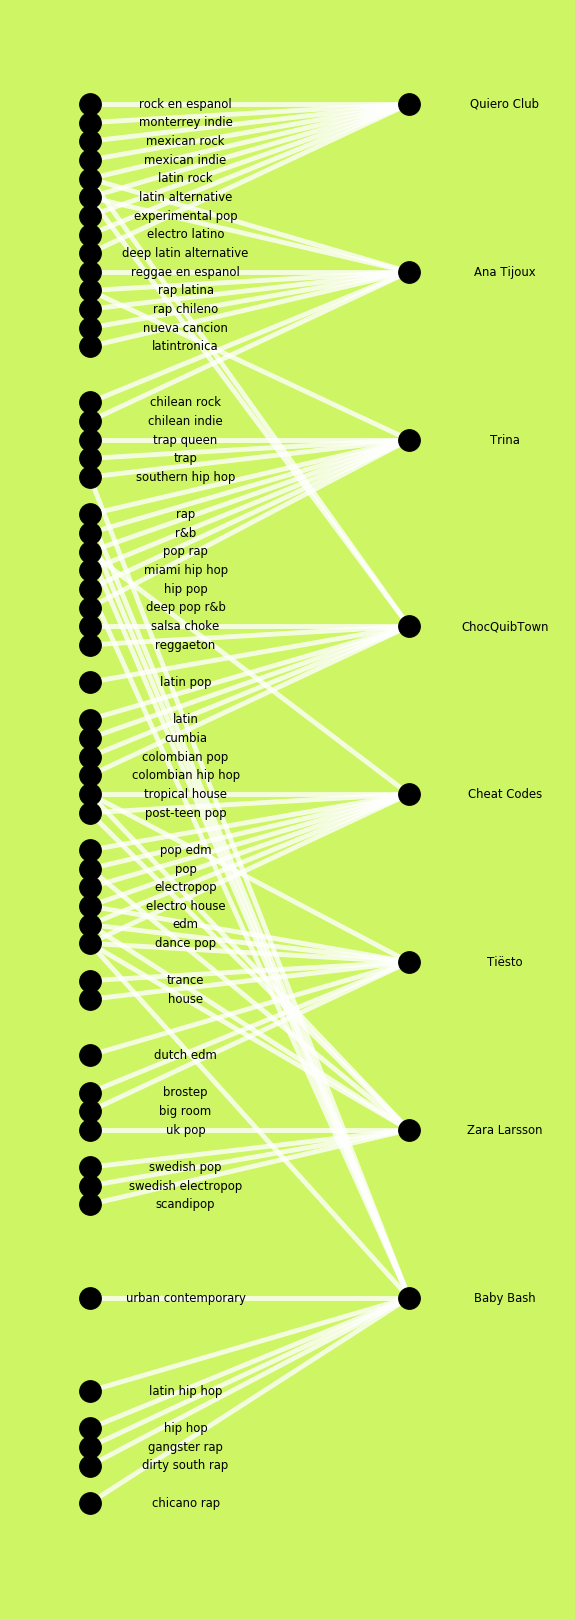

In [54]:
fig=plt.figure(figsize=(10, 30), dpi= 70, edgecolor='b')
plt.rcParams['figure.facecolor'] = 'cdf564'

plt.rcParams['axes.facecolor'] = 'cdf564'
pos = {node:[0, i] for i,node in enumerate(df_b['source'])}
pos.update({node:[1, i] for i,node in enumerate(df_b['target'])})
#nx.draw(B, pos, with_labels=False,node_color='b')231f20
nx.draw_networkx_nodes(B,pos,node_size=500,alpha=1,with_labels=False,node_color='black')
nx.draw_networkx_edges(B,pos, width=5,alpha=0.8,edge_color='w')
for p in pos:  # raise text positions
    pos[p][1] += 0
    pos[p][0] += 0.30
nx.draw_networkx_labels(B, pos)
plt.axis('off')
plt.axis((-0.20,1.5,-5,80))
plt.show()


#### Centrality Measures for Bipartire Graph

In [28]:
i=0
for measure in c_measures:
    # Display which measure
    print("-------")
    print(measure.__name__)
    centralities = measure(B)

    # Print artist name, centrality, and Spotify popularity
    i = 1
    for k, v in sorted(centralities.items(), key=lambda t: t[1], reverse=True):
        print (str(i) + '. ' + k + ': ' + str(v) + ' - '  + 'degree: ' + str(g.degree(k)))
        i += 1
        if i > 10:
            break

-------
degree_centrality
1. Baby Bash: 0.1935483870967742 - degree: 85
2. Trina: 0.16129032258064516 - degree: 99
3. Zara Larsson: 0.14516129032258063 - degree: 4
4. Tiësto: 0.14516129032258063 - degree: 407
5. Cheat Codes: 0.14516129032258063 - degree: []
6. ChocQuibTown: 0.14516129032258063 - degree: 10
7. Ana Tijoux: 0.14516129032258063 - degree: 10
8. Quiero Club: 0.14516129032258063 - degree: 7
9. dance pop: 0.06451612903225806 - degree: []
10. pop rap: 0.04838709677419355 - degree: []
-------
closeness_centrality
1. Trina: 0.29107981220657275 - degree: 99
2. pop rap: 0.2818181818181818 - degree: []
3. rap latina: 0.2767857142857143 - degree: []
4. hip pop: 0.2627118644067797 - degree: []
5. r&b: 0.2627118644067797 - degree: []
6. rap: 0.2627118644067797 - degree: []
7. southern hip hop: 0.2627118644067797 - degree: []
8. Baby Bash: 0.2616033755274262 - degree: 85
9. Ana Tijoux: 0.2616033755274262 - degree: 10
10. Cheat Codes: 0.2551440329218107 - degree: []
-------
betweenness_c

# Cliques

## Estimating K-Clique & Overlapping communities

In [29]:
len(list(nx.find_cliques(g)))

4857

#### There is a total of 4857 cliques in the network

In [30]:
for i in nx.find_cliques(g):
    print(i)

['Padrino', 'Bulova']
['Crazy Design', 'El Mayor Clasico']
['Crazy Design', 'Bulin 47']
['Shonie', 'Trina']
['Divino & Baby Ranks', 'Wisin & Yandel']
['Lele', 'Cosculluela']
['Jhon Alex Castaño', 'Robert Londoño']
['Jhon Alex Castaño', 'Yeison Jimenez']
['Dietrich Buxtehude', 'Johann Sebastian Bach']
['Dulce María', 'Río Roma']
['Elvis KNK', 'Bad Gyal']
['Spunky', 'La Prohibida']
['Eddy Lover', 'Nigga']
['Eddy Lover', 'La Factoria']
['Eddy Lover', 'Martin Machore']
['Eddy Lover', 'Kemzo']
['Eddy Lover', 'JR Ranks']
['Eddy Lover', 'Joey Montana']
['Monckey Black', 'Quimico Ultra Mega']
['Alec Sander', 'Disco Ruido']
['Mustard Pimp', 'Steve Aoki']
['Chabuco', 'Pantoja', 'Fonseca']
['Boy C', 'Latin Fresh']
['Xharly King', 'Santaflow']
['Joseph El De La Urba', 'La Nueva Escuela']
['Dirt Monkey', 'ILLENIUM']
['Mr. Oizo', 'Steve Aoki']
['Robert M. Helmschrott', 'Johann Sebastian Bach']
['Don Pillo', 'Uzielito Mix']
['Horacio Marano', 'Danna Paola']
['N2DEEP', 'Baby Bash']
['Tenishia', 'Cosmi

['Thalía', 'Fonseca']
['Thalía', 'Robbie Williams']
['Thalía', 'DJ Urba']
['Thalía', 'OMI']
['Thalía', 'Prince Royce', 'Maluma']
['Thalía', 'Dabruk']
['Thalía', 'Joan Sebastian']
['Thalía', 'Natti Natasha']
['Thalía', 'Gente De Zona', 'Carlos Rivera']
['Thalía', 'Gente De Zona', 'El Micha']
['Thalía', 'Gente De Zona', 'Ana Mena']
['Thalía', 'Gente De Zona', 'Silvestre Dangond']
['Thalía', 'Paco Pérez']
['Thalía', 'Fat Joe']
['Thalía', 'Gustavo Borner']
['Thalía', 'Erik Rubin']
['Thalía', 'Pedro Capó']
['Thalía', 'Lali']
['Thalía', 'Maluma', 'El Micha']
['Thalía', 'Maluma', 'Carlos Vives']
['Thalía', 'Chiky Bom Bom "La Pantera"']
['Thalía', 'Lenny Santos']
['Niteck', 'Santa Fe Klan']
['Papayo', 'Sensato', 'Pitbull']
['Gianluca Vacchi', 'Sebastian Yatra']
['Tiny Sierra', 'Lito Kirino']
['Raw Alejandro', 'Alex Rose']
['Jenni Rivera', 'Olga Tañón']
['Jenni Rivera', 'Tito "El Bambino"']
['Florentino', 'Bad Gyal']
['King Kino', 'Tabou Combo']
['Fat Joe', 'Pitbull', 'Baby Bash']
['Fat Joe', '

['Alicia Keys', 'Alejandro Sanz']
['J Alvarez', 'Oneill']
['J Alvarez', 'Genio El Mutante']
['J Alvarez', 'Franco "El Gorilla"', 'Alexis y Fido']
['J Alvarez', 'Franco "El Gorilla"', 'Ivy Queen', 'Nengo Flow']
['J Alvarez', 'Juanka El Problematik', 'Darkiel']
['J Alvarez', 'Nova y Jory', 'Alexis y Fido']
['J Alvarez', 'Pusho', 'Darkiel']
['J Alvarez', 'DJ Nelson', 'Zion']
['J Alvarez', 'DJ Nelson', 'Jowell & Randy', 'Daddy Yankee', 'Arcangel']
['J Alvarez', 'DJ Nelson', 'Jowell & Randy', 'Ivy Queen']
['J Alvarez', 'DJ Nelson', 'Baby Rasta']
['J Alvarez', 'Juno "The Hitmaker"']
['J Alvarez', 'Farruko', 'Jowell & Randy', 'Wisin', 'Daddy Yankee', 'Alexis y Fido', 'Zion & Lennox']
['J Alvarez', 'Farruko', 'Jowell & Randy', 'Wisin', 'Daddy Yankee', 'Alexis y Fido', 'Cosculluela']
['J Alvarez', 'Farruko', 'Jowell & Randy', 'Wisin', 'Ivy Queen']
['J Alvarez', 'Farruko', 'Jowell & Randy', 'Arcangel', 'El Alfa', 'Bad Bunny']
['J Alvarez', 'Farruko', 'Jowell & Randy', 'Arcangel', 'Luigi 21 Plus'

['Sensato', 'El Mayor Clasico', 'Don Miguelo']
['Sensato', 'Papi Wilo']
['Sensato', 'DIOLI']
['Sensato', 'Nfasis', 'Los Teke Teke']
['Sensato', 'Tali']
['Sensato', '8ky']
['Sensato', 'Omega', 'Monkey Black']
['Sensato', 'Don Miguelo', 'Poeta Callejero']
['Sensato', 'Joell Ortiz']
['J Ferro', 'Big Yamo']
['Flex', 'Mr. Saik', 'Los Rabanes']
['Flex', 'Duende']
['Flex', 'Alexis y Fido']
['Flex', 'Alex Pro']
['O.G. Black', 'DJ Nelson']
['Niccolò Paganini', 'Johann Sebastian Bach']
['Aleksander Debicz', 'Johann Sebastian Bach']
['JD Surabaya', 'DJ Nelson']
['Wisin & Yandel', 'Mr. Phillips']
['Wisin & Yandel', "O'neil"]
['Wisin & Yandel', 'Tainy', 'Miky Woodz', 'Jhay Cortez']
['Wisin & Yandel', 'Tainy', 'Alexis y Fido', 'Daddy Yankee', 'Don Omar']
['Wisin & Yandel', 'Tainy', 'Alexis y Fido', 'Yomo']
['Wisin & Yandel', 'Tainy', 'Baby Rasta']
['Wisin & Yandel', 'Sean Kingston']
['Wisin & Yandel', 'Wibal Y Alex']
['Wisin & Yandel', 'Fido', 'Yandel']
['Wisin & Yandel', 'Gadiel', 'Yandel']
['Wisin

['Bachata Heightz', 'Circharles']
['Bachata Heightz', 'Grupo Extra']
['Bachata Heightz', 'Felix Baloy']
['Bachata Heightz', 'Sandunga']
['Bachata Heightz', 'Elvis Crespo']
['Bachata Heightz', 'Chispa y los Cómplices']
['Bachata Heightz', 'Adrián Fanello']
['Bachata Heightz', 'Rafael Gayoso']
['Bachata Heightz', 'Los Matecoco']
['Bachata Heightz', 'Bachata Salvaje']
['Bachata Heightz', 'Trini Lopez']
['Cristoph', 'Cosmic Gate']
['Makano', 'La Factoria']
['Wibal Y Alex', 'DJ Nelson']
['Manuel Julián', 'Felipe Peláez']
['El Mega', 'Black Jonas Point']
['El Mega', 'El Mayor Clasico']
['Sound Remedy', 'ILLENIUM']
['Natalia Lacunza', 'BRONQUIO']
['Natalia Lacunza', 'mori']
['Natalia Lacunza', 'Marem Ladson']
['Natalia Lacunza', 'Marta Sango', 'Alba Reche']
['Caetano Veloso', 'Nelly Furtado']
['Reykon', 'Luigui 21 Plus']
['Reykon', 'Daddy Yankee', 'Farruko', 'Nicky Jam']
['Reykon', 'Daddy Yankee', 'Farruko', 'Jowell & Randy']
['El Grupo de Salve de Mata Los Indios', 'Vicente Garcia']
['Silvia

['Los Intocables', 'Felipe Peláez']
['Dalmata', 'Sebastian Yatra']
['Tatiana Klauss', 'Cali Y El Dandee']
['Shakira', 'MAGIC!']
['Patric La Funk', 'Cosmic Gate']
['Cano Bit', 'Don Chezina']
['DJ Sustancia', 'Tomasa del Real']
['Emy Soul', 'Aleman']
['RK', 'MC Davo']
['El Gran Martín Elías', 'Felipe Peláez']
['Benny Benassi', 'Calvin Harris']
['Blesk', 'Aleman']
['Felipe Peláez', 'Various Artists']
['Felipe Peláez', 'Felipe Peláez A Duo Ivan Villazon']
['Felipe Peláez', 'Ronal Urbina']
['Felipe Peláez', 'Alex Manga']
['Felipe Peláez', 'El Tuyero Ilustrado']
['Felipe Peláez', 'Osnaider Brito']
['Felipe Peláez', 'Larry Iguaran']
['Pedro El Arquitecto', 'El Mayor Clasico']
['Derek Allen', 'Diplo']
['Shelow Shaq', 'Pon Flow']
['Damian Marley', 'KAROL G']
['Kronno Zomber', 'iTownGameplay']
['Foy Vance', 'ILLENIUM']
['Kronos Quartet', 'Nelly Furtado']
['DaniLeigh', 'Kap G']
['DaniLeigh', 'Kes']
['Fase', 'Karen Méndez']
['Cosculluela', 'Sebastian Yatra']
['Jason Ross', 'Cosmic Gate']
['Paula F

#### Let's find the largest cliques

In [31]:
m=[]
for i in nx.find_cliques(g):
    if (len(i)>7): 
        (print(i))
        m.append(i)

['Tito "El Bambino"', 'Farruko', 'Wisin', 'Daddy Yankee', 'Zion & Lennox', 'Alexis y Fido', 'Don Omar', 'Wisin & Yandel']
['Tito "El Bambino"', 'Yandel', 'Daddy Yankee', 'Wisin', 'Zion & Lennox', 'Alexis y Fido', 'Don Omar', 'Wisin & Yandel']


#### Generating the large Cliques

In [32]:
K0=g.subgraph(m[0])
K1=g.subgraph(m[1])

In [33]:
print(nx.info(K0))
print(nx.info(K1))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 28
Average degree:   7.0000
Name: 
Type: Graph
Number of nodes: 8
Number of edges: 28
Average degree:   7.0000


#### We can confirm this cliques are fully connected since there are 8 nodes and the average degree is 7

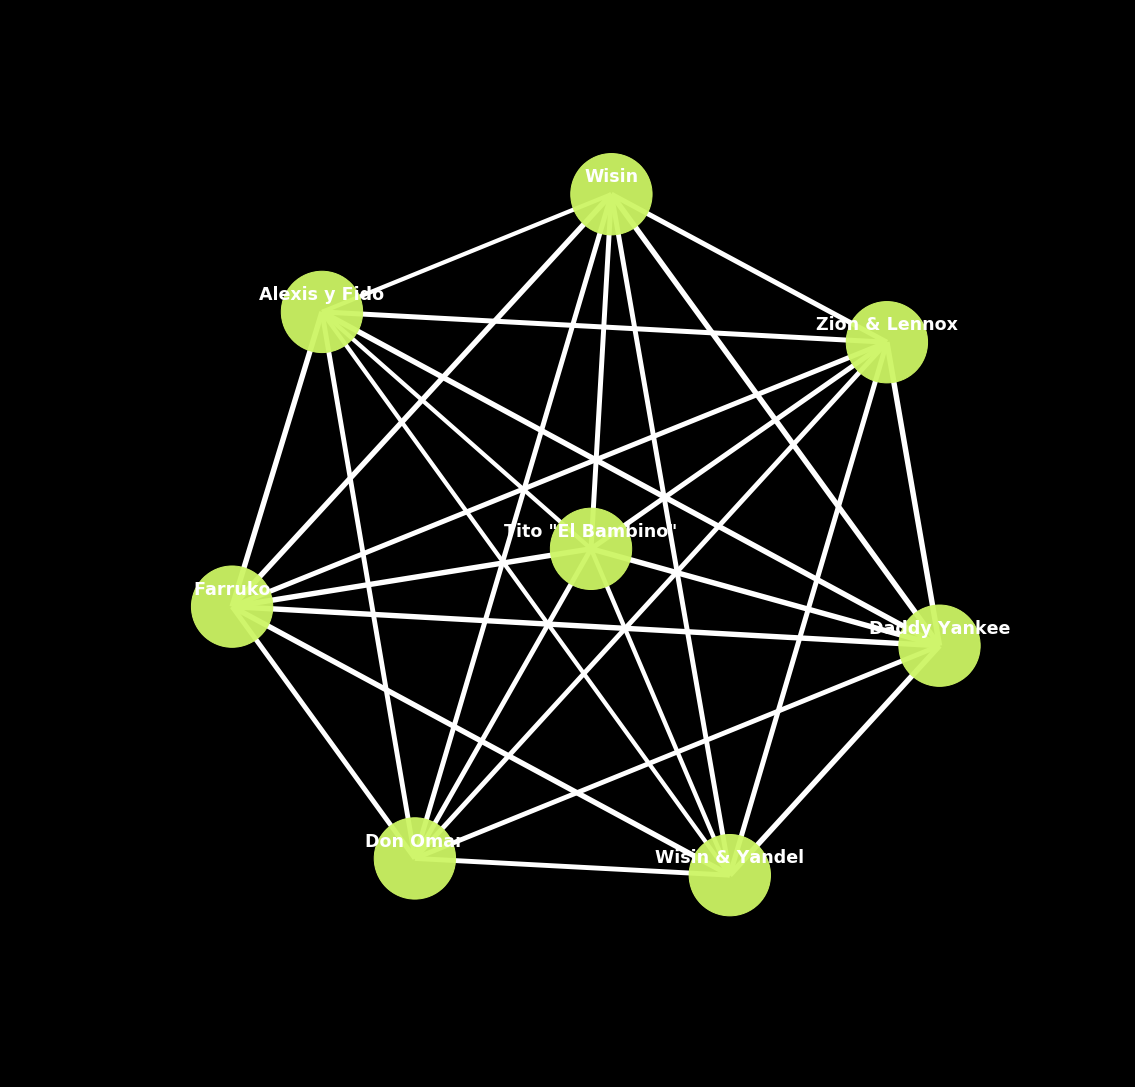

In [56]:
graph=K0
weights = [graph[u][v]['Popularity'] + 1 for u,v in graph.edges()] 
labelcolor='w'
#labelcolor='#00b4d9'
fig=plt.figure(figsize=(20, 20), dpi= 70)
plt.rcParams['figure.facecolor'] = '#000000'
plt.rcParams['axes.facecolor'] = '#000000'
pos = nx.fruchterman_reingold_layout(graph,k=1,scale=0.1)
#nx.draw(B, pos, with_labels=False,node_color='b')231f20
nx.draw_networkx_nodes(graph,pos,node_size=[1000 * graph.degree(n) for n in graph],
                       alpha=0.95,with_labels=False,node_color='#cdf564')
nx.draw_networkx_edges(graph,pos, width= weights,alpha=1,edge_color='w')
for p in pos:  # raise text positions
    pos[p][1] += 0.005
    pos[p][0] += 0
nx.draw_networkx_labels(graph, pos,font_size=18,
                        font_color=labelcolor, font_weight='bold')
plt.axis('off')
plt.show()

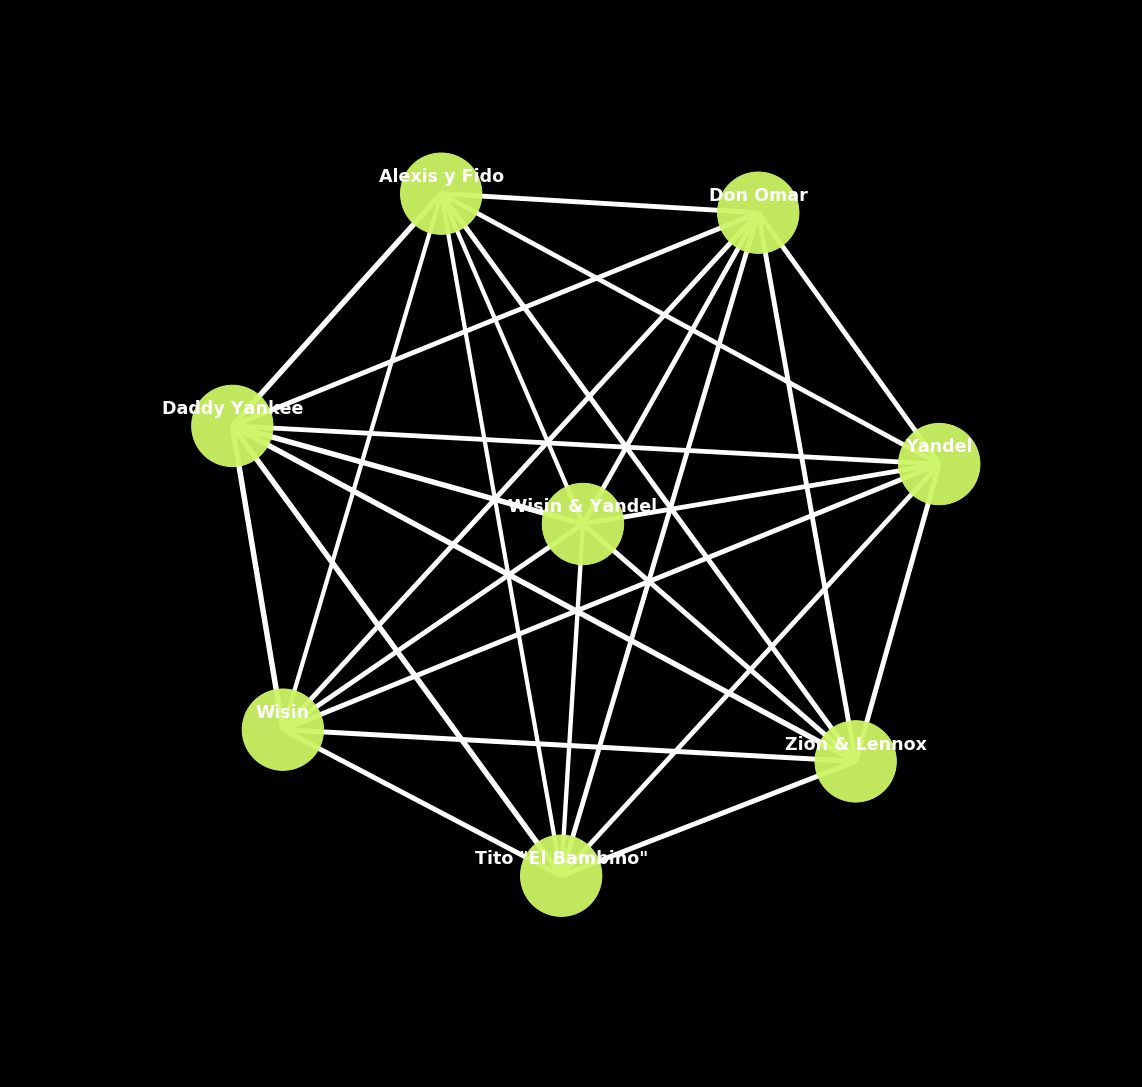

In [35]:
graph=K1
weights = [graph[u][v]['Popularity'] + 1 for u,v in graph.edges()] 
labelcolor='w'
#labelcolor='#00b4d9'
fig=plt.figure(figsize=(20, 20), dpi= 70)
plt.rcParams['figure.facecolor'] = '#000000'
plt.rcParams['axes.facecolor'] = '#000000'
pos = nx.fruchterman_reingold_layout(graph,k=1,scale=0.1)
#nx.draw(B, pos, with_labels=False,node_color='b')231f20
nx.draw_networkx_nodes(graph,pos,node_size=[1000 * graph.degree(n) for n in graph],
                       alpha=0.95,with_labels=False,node_color='#cdf564')
nx.draw_networkx_edges(graph,pos, width= weights,alpha=1,edge_color='w')
for p in pos:  # raise text positions
    pos[p][1] += 0.005
    pos[p][0] += 0
nx.draw_networkx_labels(graph, pos,font_size=18,
                        font_color=labelcolor, font_weight='bold')
plt.axis('off')
plt.show()

#### In which Cliques can we find Luis Fonsi?

In [36]:
nx.cliques_containing_node(g, 'Luis Fonsi')

[['Aleks Syntek', 'Luis Fonsi'],
 ['Cutfather & Joe', 'Luis Fonsi'],
 ['Stefflon Don', 'Luis Fonsi'],
 ['Ozuna', 'Wisin & Yandel', 'Yandel', 'Luis Fonsi'],
 ['Ozuna', 'KAROL G', 'Yandel', 'Luis Fonsi'],
 ['Ozuna', 'Luis Fonsi', 'Yandel', 'Nacho'],
 ['Juan Luis Guerra 4.40', 'Luis Fonsi'],
 ['Wisin & Yandel', 'Luis Fonsi', 'Yandel', 'Daddy Yankee'],
 ['Christina Valemi', 'Luis Fonsi'],
 ['Dennis Nieves', 'Luis Fonsi'],
 ['Bustamante', 'Luis Fonsi'],
 ['Germán Montero', 'Luis Fonsi'],
 ['Christian B', 'Luis Fonsi'],
 ['Laura Pausini', 'Luis Fonsi'],
 ['M.J.', 'Luis Fonsi'],
 ['Demi Lovato', 'Luis Fonsi'],
 ['Kyle "Kysch" Scholler', 'Luis Fonsi']]

## Collaboration Suggestions

#### Preferential attachment means that the more connected a node is, the more likely it is to receive new links. This algorithm was popularised by Albert-László Barabási and Réka Albert through their work on scale-free networks. 

#### A value of 0 indicates that two nodes/artists are not close, while higher values indicate that nodes are closer. With this concept we can create suggestions of which artist should collaborate.

In [37]:
l = []
for i in nx.preferential_attachment(g, ebunch=None):
    l.append(i)
len(l)

8060699

#### There is a total of 8,060,699 suggestions of connections for the global graph
#### Let's look at the top 10 preferential attachments of the network

In [38]:
sorted(l, key=lambda l: l[2],reverse=True)[:10]

[('Johann Sebastian Bach', 'Tiësto', 58201),
 ('Steve Aoki', 'Tiësto', 57794),
 ('Pitbull', 'Tiësto', 49247),
 ('Trina', 'Tiësto', 40293),
 ('DJ Nelson', 'Tiësto', 36223),
 ('Baby Bash', 'Tiësto', 34595),
 ('J Alvarez', 'Tiësto', 30118),
 ('Major Lazer', 'Tiësto', 29304),
 ('Wisin & Yandel', 'Tiësto', 28490),
 ('Farruko', 'Tiësto', 28490)]

#### Through this insights we can understand that a song between Tiësto featuring some of John Sebastian Bach's composition, or a song between Tiësto and Steve Aoki is highly likeable. We can also search for a specific artist to evaluate with whom the artist should collaborate. Let's take Luis Fonsi as an example:

In [39]:
sorted( (f for f in l if 'Luis Fonsi' in f), key=lambda l: l[2],reverse=True)[:10]

[('Tiësto', 'Luis Fonsi', 7733),
 ('Johann Sebastian Bach', 'Luis Fonsi', 2717),
 ('Steve Aoki', 'Luis Fonsi', 2698),
 ('Pitbull', 'Luis Fonsi', 2299),
 ('Luis Fonsi', 'Cosmic Gate', 2223),
 ('Trina', 'Luis Fonsi', 1881),
 ('DJ Nelson', 'Luis Fonsi', 1691),
 ('Baby Bash', 'Luis Fonsi', 1615),
 ('J Alvarez', 'Luis Fonsi', 1406),
 ('Major Lazer', 'Luis Fonsi', 1368)]

## K-Clique Communities

#### The purpose of obtaining K-Clique is to find the sub-communities of artists that exist within the main/full community. In that way, we are able to tell how many networks are there and the overlapping artist members that tie one community to another. 

#### We iterated on generating communities of 1 to 5 K-Cliques. In theory, 3 to 5 K-Cliques are the optimum as below that are not enough to hold a community together as one community should have at least one node connected to two adjacent nodes. That is why 1 K-Clique does not make sense as it simply returns the full network, not sub-communities.

#### Hence, our analysis precluded K-Cliques 1 and 2.

#### As we increase the iterator of the K-Cliques, we see that the communities are shrinking in size and number. This is denoted by the "frozenset" coded in python. 

#### We can see for instance that with K-Cliques of 3, Tiësto is an overlapping agent in more than one sub-community.

In [40]:
def get_percolated_cliques(G, k):
    cliques = list(frozenset(c) for c in nx.find_cliques(G) if len(c) >= k)
    perc_graph = nx.Graph()
    perc_graph.add_nodes_from(cliques)
    for c1, c2 in combinations(cliques, 2):
        if len(c1.intersection(c2)) >= (k - 1):
            perc_graph.add_edge(c1, c2)
    for component in nx.connected_components(perc_graph):
        yield(frozenset.union(*component))

In [41]:
#k=1
mygenerator = get_percolated_cliques(g,1)
for i in mygenerator:
    print(i)

frozenset({'Padrino', 'Crazy Design', 'Shonie', 'Divino & Baby Ranks', 'Lele', 'A3', 'Jhon Alex Castaño', 'Dietrich Buxtehude', 'Dulce María', 'Richard Durand', 'Spunky', 'Elvis KNK', 'Eddy Lover', 'Monckey Black', 'Fonzerelli', 'Alec Sander', 'Mustard Pimp', 'Chabuco', 'Boy C', 'Joseph El De La Urba', 'Xharly King', 'Dirt Monkey', 'Steve Forte Rio;Lindsey Ray', 'Mr. Oizo', 'Robert M. Helmschrott', 'Don Pillo', 'Horacio Marano', 'N2DEEP', 'Taucher', 'Tenishia', 'Adán Zapata', 'Loc', 'Ray Kurzweil', 'Gemeliers', 'Felipe Araújo', 'Mr Saik, Conjunto Juncal', 'De La Ghetto', 'Pipo Ti', 'Bassnectar', 'Christian Nodal', 'Lexingthon', 'D.OZI', 'Álvaro López', 'Hilary Hahn', 'K-Mill', 'Noodles', 'Rivers Cuomo', 'Jorge Milliano', 'Kid Cudi & Travis Barker', 'Darlene', 'Steve May', 'Alma Galarza', 'Ayla', 'Orishas', 'Nelson Freire', 'Shigeto', 'Ben McInerney', 'Anthony Touma', 'Sasha Sloan', '24 Horas', 'Francisco Céspedes', 'Sherry St.Germain', 'Natalia y La Forquetina', 'Gabriel Romero', 'Lyri

In [42]:
#k=2
mygenerator = get_percolated_cliques(g,2)
for i in mygenerator:
    print(i)

frozenset({'Padrino', 'Crazy Design', 'Shonie', 'Divino & Baby Ranks', 'Lele', 'A3', 'Dietrich Buxtehude', 'Dulce María', 'Richard Durand', 'Elvis KNK', 'Eddy Lover', 'Monckey Black', 'Fonzerelli', 'Alec Sander', 'Mustard Pimp', 'Chabuco', 'Boy C', 'Joseph El De La Urba', 'Dirt Monkey', 'Steve Forte Rio;Lindsey Ray', 'Mr. Oizo', 'Robert M. Helmschrott', 'Horacio Marano', 'N2DEEP', 'Taucher', 'Tenishia', 'Adán Zapata', 'Loc', 'Ray Kurzweil', 'Felipe Araújo', 'Mr Saik, Conjunto Juncal', 'De La Ghetto', 'Pipo Ti', 'Bassnectar', 'Christian Nodal', 'Lexingthon', 'D.OZI', 'Álvaro López', 'Hilary Hahn', 'K-Mill', 'Noodles', 'Rivers Cuomo', 'Jorge Milliano', 'Kid Cudi & Travis Barker', 'Darlene', 'Steve May', 'Alma Galarza', 'Ayla', 'Orishas', 'Nelson Freire', 'Shigeto', 'Ben McInerney', 'Anthony Touma', 'Sasha Sloan', '24 Horas', 'Francisco Céspedes', 'Sherry St.Germain', 'Natalia y La Forquetina', 'Gabriel Romero', 'Lyriq Tye', 'Big Man', 'Luke Cage', 'Baby Wally', 'Travis Scott', 'Cheing', 

In [43]:
#k=3
mygenerator = get_percolated_cliques(g,3)
for i in mygenerator:
    print(i)

frozenset({'Santiago Cruz', 'Andrés Cepeda', 'Abel Pintos', 'Kany Garcia', 'Chabuco', 'Pedro Capó', 'Rozalén', 'Pantoja', 'Dani Martín', 'Fonseca', 'Natalia Lafourcade'})
frozenset({'El Roockie', 'Latin Fresh', 'De La Ghetto'})
frozenset({'Noriel', 'Andy Montañez', 'Tali Goya', 'Myke Towers', 'Tainy', 'Juanka El Problematik', 'Lary Over', 'Black Jonas Point', 'Alexis y Fido', 'Rauw Alejandro', 'Baby Rasta', 'Guelo Star', 'Mr. Vegas', 'Gadiel', 'Tito "El Bambino"', 'Luigi 21 Plus', 'Noel Schajris', 'Milka', 'Amenazzy', 'Jayma', 'Farruko', 'Abraham Mateo', 'Chris Brown', 'Konshens', 'Vicente Fernández', 'Shadow Blow', 'Jadiel', 'Kevin Roldan', 'Julio Voltio', 'Afrojack', 'J Balvin', 'MelyMel', 'Bulova', 'Romeo Santos', 'De La Ghetto', 'Zacarias Ferreira', 'Yandel', 'Trina', 'Chyno Miranda', 'Lolo en el Microfono', 'D.OZI', 'Snoop Dogg', 'Ha*Ash', 'Juanka', 'José José', 'Baraka', 'Zion & Lennox', 'Enrique Iglesias', 'Darell', 'Los Rakas', 'El Roockie', 'El Micha', 'Dyland & Lenny', 'Diplo

In [44]:
#k=4
mygenerator = get_percolated_cliques(g,4)
for i in mygenerator:
    print(i)

frozenset({'Marc Anthony', 'Franco "El Gorilla"', 'Tainy', 'Myke Towers', 'Justin Quiles', 'Zion', 'Alexis y Fido', 'DJ Nelson', 'Tito "El Bambino"', 'Wisin', 'Luigi 21 Plus', 'Amenazzy', 'Gallego', 'Farruko', 'Jory Boy', 'Reik', 'Nicky Jam', 'Miky Woodz', 'Kevin Roldan', 'Julio Voltio', 'J Balvin', 'De La Ghetto', 'Bad Bunny', 'Yandel', 'Chyno Miranda', 'D.OZI', 'Randy', 'Yomo', 'Darell', 'Zion & Lennox', 'Enrique Iglesias', 'Dyland & Lenny', 'Tony Dize', 'Darkiel', 'Daddy Yankee', 'Eladio Carrion', 'Jowell & Randy', 'Trebol Clan', 'Ñejo', 'Anuel AA', 'Akon', 'Maluma', 'Dalmata', 'Yaga & Mackie', 'Almighty', 'Dalex', 'Nengo Flow', 'R.K.M & Ken-Y', 'Jhay Cortez', 'Ednita Nazario', 'Chyno Nyno', 'Don Omar', 'Sean Paul', 'Sech', 'Ivy Queen', 'Ricky Martin', 'Nacho', 'Pitbull', 'Arcangel', 'Cosculluela', 'Divino', 'Wisin & Yandel', 'J Alvarez', 'Prince Royce', 'Bryant Myers', 'Reykon', 'Luis Fonsi', 'Héctor "El Father"', 'Alexis', 'Manuel Turizo', 'El Alfa', 'Fat Joe', 'KAROL G', 'Ozuna',

In [45]:
#k=4
mygenerator = get_percolated_cliques(g,5)
for i in mygenerator:
    print(i)

frozenset({'Nengo Flow', 'Tainy', 'Myke Towers', 'Justin Quiles', 'Zion', 'Don Omar', 'Sech', 'Alexis y Fido', 'Ivy Queen', 'DJ Nelson', 'Nacho', 'Tito "El Bambino"', 'Wisin', 'Cosculluela', 'Luigi 21 Plus', 'Wisin & Yandel', 'Arcangel', 'Pitbull', 'Farruko', 'J Alvarez', 'Jory Boy', 'Reik', 'Prince Royce', 'Nicky Jam', 'Miky Woodz', 'Bryant Myers', 'Héctor "El Father"', 'J Balvin', 'Alexis', 'Manuel Turizo', 'El Alfa', 'De La Ghetto', 'Bad Bunny', 'Yandel', 'Chyno Miranda', 'Ozuna', 'Yomo', 'Darell', 'Zion & Lennox', 'Dyland & Lenny', 'Tony Dize', 'Daddy Yankee', 'Baby Rasta & Gringo', 'Plan B', 'Jowell & Randy', 'Tego Calderon', 'Ñejo', 'Anuel AA', 'Maluma'})
frozenset({'Miky Woodz', 'Zion & Lennox', 'Eladio Carrion', 'Jhay Cortez', 'J Balvin'})


### 6 K-Clique

In [46]:
L=list((list(get_percolated_cliques(g,6)))[0])

In [47]:
L=g.subgraph(L)

In [48]:
print(nx.info(L))

Name: 
Type: Graph
Number of nodes: 30
Number of edges: 201
Average degree:  13.4000


#### The network generated by choosing a 6 K-Clique, generated a 30 node netword, with 201, with and average degree of 13.4. 

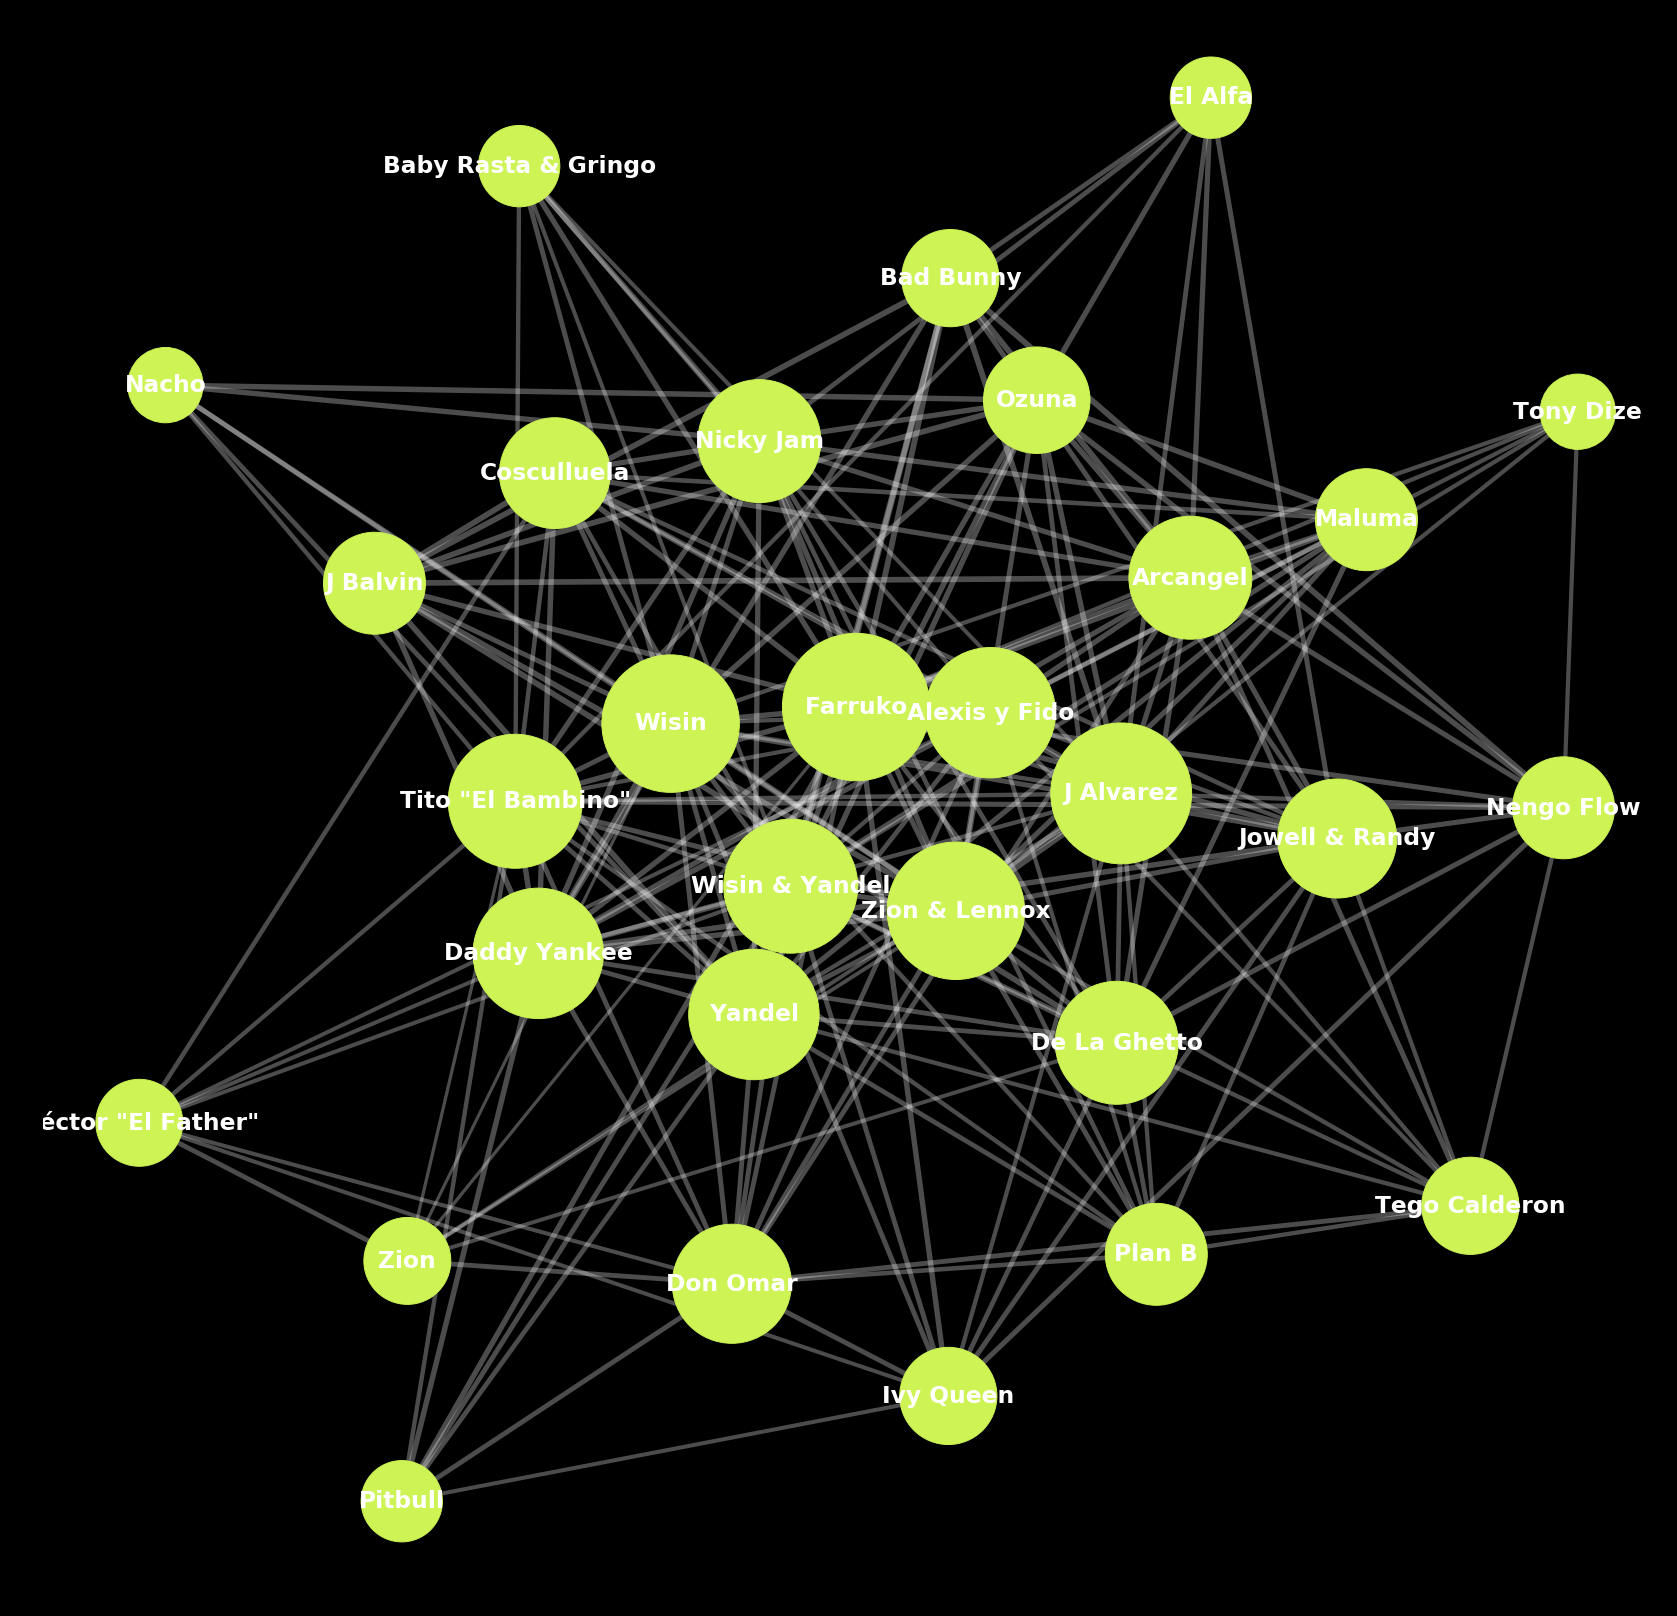

In [49]:
graph=L
weights = [graph[u][v]['Popularity'] + 1 for u,v in graph.edges()] 
labelcolor='w'
#labelcolor='#00b4d9'
fig=plt.figure(figsize=(30, 30), dpi= 70)
plt.rcParams['figure.facecolor'] = '#000000'
plt.rcParams['axes.facecolor'] = '#000000'
pos = nx.spring_layout(graph)
#nx.draw(B, pos, with_labels=False,node_color='b')231f20
nx.draw_networkx_nodes(graph,pos,node_size=[1000 * graph.degree(n) for n in graph],
                       alpha=1,with_labels=False,node_color='#cdf354')
nx.draw_networkx_edges(graph,pos, width= weights,alpha=0.30,edge_color='w')
for p in pos:  # raise text positions
    pos[p][1] += 0
    pos[p][0] += 0
nx.draw_networkx_labels(graph, pos,font_size=24,
                        font_color=labelcolor, font_weight='bold')
plt.axis('off')
plt.show()

#### As seen in the visualization, the network is highly connected, however, we can see nodes that are not connected like Nacho and Pitbull. Within this community we can run a preferential attachment analysis to detect which connections are the most likely.

In [51]:
s = []
for i in nx.preferential_attachment(L, ebunch=None):
    s.append(i)

In [52]:
sorted(s, key=lambda s: s[2],reverse=True)[:10]

[('Farruko', 'Yandel', 414),
 ('Wisin & Yandel', 'J Alvarez', 399),
 ('J Alvarez', 'Nicky Jam', 336),
 ('Wisin', 'Arcangel', 320),
 ('Wisin', 'De La Ghetto', 320),
 ('Arcangel', 'Zion & Lennox', 320),
 ('Don Omar', 'J Alvarez', 315),
 ('Tito "El Bambino"', 'Arcangel', 304),
 ('Tito "El Bambino"', 'De La Ghetto', 304),
 ('Arcangel', 'Wisin & Yandel', 304)]